**Title:** "Aviation Passenger Trends: A Time Series Analysis"

**Description:** This time series analysis delves into the trends and fluctuations in airplane passenger numbers over a defined period. By examining seasonal variations, peak travel times, and factors influencing demand—such as economic conditions, travel restrictions, and emerging travel trends—the study provides valuable insights into the aviation industry's dynamics. The findings aim to assist airlines, airports, and policymakers in understanding passenger behavior and enhancing operational planning, marketing strategies, and service offerings.

- # Time series
- Time series is univariate i.e one variable is present
- When we compared time series to other ml algorithm like LR,Logistic,DT,RF,and KNN we were having separate X and Y variable
- But in time series there is no separate X and Y Variable .A single series will have both X and Y variable
- Paterns in time Series
- 1.Trend 2.Sesonality 3.Cyclic 4.Random

- # Trends
- when will values either increase or decrease with respect to time
- A.Up-Trend (Values increasing continuously) `Ex.Social Media Users` & B.Down-Trend (Values decreasing continuously) `Ex.Japan Population,Sales of Non-smart phones`
- # Sesonality
- values will rise and fall for fixed time period
- Ex.NO of people visiting during holidays 2.Sale of Umbrella,Cooler,Sweaters
- # Cyclic
- values will rise and fall But not for fixed time period and generaly time period is more than 2 years
- Ex.Bank repo rate,recession,employment rate ,census
- # Random
- if time series is not in trend nor seasona nor even cyclic its random
- Ex.stock market,crypto-value,oil price

- #`When Values are random no Time series cant be build`

- # condition -
- 1.Stationarity is main assumption in time series 
-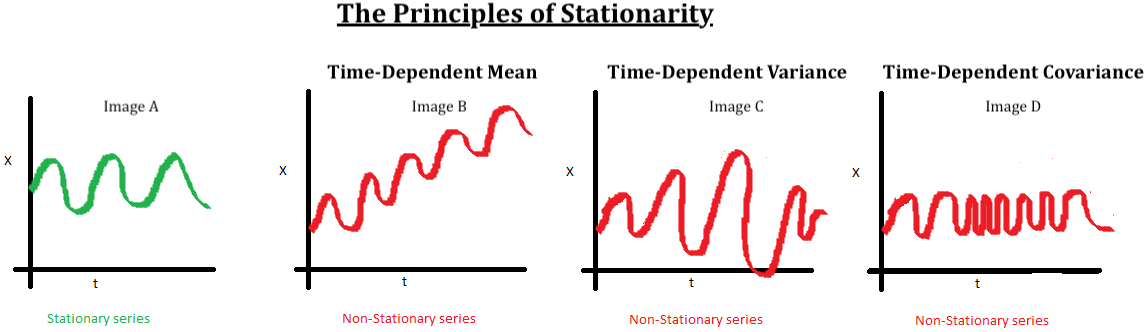

- For stationarity `mean` and `variance` are constant or unchanging

- 1.Time series is not stationary then we will make it stationary
- 2.To make series stationary we use `Differencing technique`
-  `Differencing technique`means subtracting one term from another term
-  

- # Time series model
- 1.Autoregressive time series model (AR)
- 2.Moving average (MA)
- 3.ARIMA model
- 4.SARIMA model
- 5.SARIMAX model

- # 1.Autoregressive time series model (AR)
- Future values are forcasted using past values
- yt = c + Y1YT-1 + Y2YT-2 + ...+YNYT-n
- Recent time data is more important

- # 2.Moving average (MA)
- future values are forecasted using past error terms
- error term is actual-predicted value of before prediction on before data
- yt = Y1Et-1 +Y2Et+...+YnEt-n

- # 3.ARMA model
- forecast is based on previous values + previous error terms
- ARMA(p,q)
- here AR can be mapped to 'p' and am can be map to'q' there can be difference between this values

- # ARIMA Autoregressive integrated moving average
- arima can be denoted as arima(p ar,d (integrated),q ma)
- value of d will be decieded by level of deferencing

- # p And q values we use
- Auto corelation function `ACF`
- Partial Auto corelation function `PACF`
- jan feb march apr may
- 510 530 540 540 580

- The correlation come from lag of series
- lag can be found by compareing previous and current
- stopping criteria for past data to be considered is decided by correlation ,`when corelation is zero stop`

https://chih-ling-hsu.github.io/2017/03/20/time-series

- If ACF declines sharply but PACF decays slowly then we conclude that its `MA process `(p will be zero)`
- 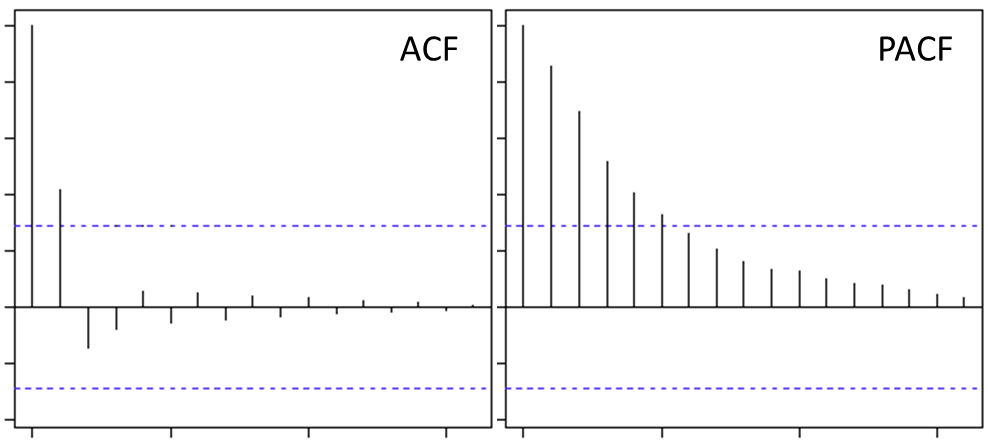

- IF PACF declines sharply but ACF decays slowly then we conclude that ite AR process `(q wil be zero)`
- 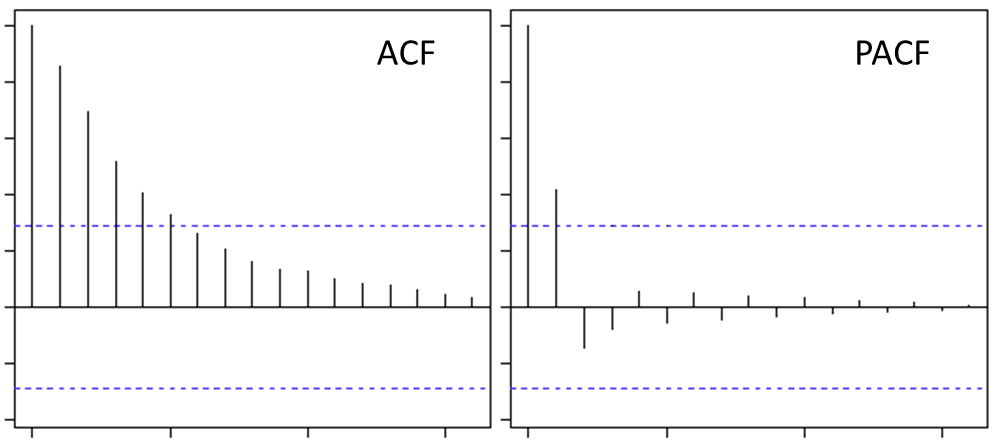

- 1. Random Sampling in time series is `crime`
- 2. We should not break time series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfai = pd.read_csv(r"AirPassengers.csv")

In [3]:
dfai

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
dfai.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
dfai.loc[:,(dfai=='?').any()].columns

Index([], dtype='object')

- # problem statement- forecast passanger for next 12 months (1961)

- 1. Random Sampling in time series is `crime`
- 2. We should not break time series

In [6]:
dfai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
dfai.Month = pd.to_datetime(dfai.Month , infer_datetime_format = True)

C:\Users\datascience\AppData\Local\Temp\ipykernel_8600\3731715953.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dfai.Month = pd.to_datetime(dfai.Month , infer_datetime_format = True)


In [8]:
dfai

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
dfai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
dfai = dfai.set_index(['Month'])

- check series is stationasry or not

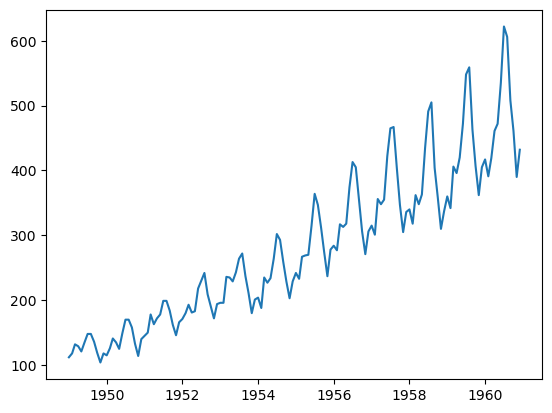

In [11]:
plt.plot(dfai)

- series is  not stationary we have to make stationary
- mean and variance increasing

In [14]:
dfai.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


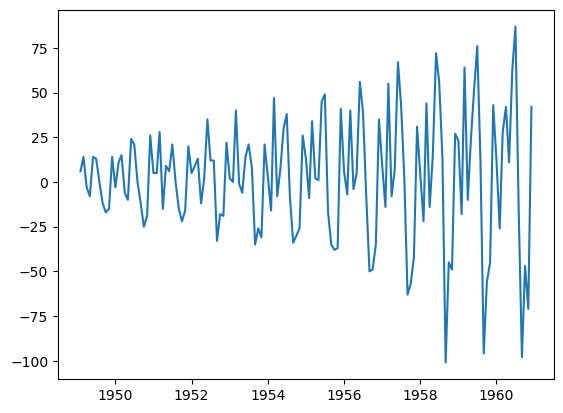

In [15]:
plt.plot(dfai.diff()) #mean is stable but variance not

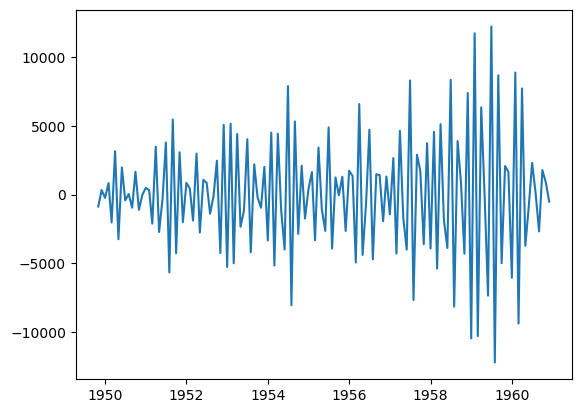

In [16]:
#second level of differencinf
plt.plot(dfai.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff()) 

- evenafter multiple level differencing series not become stationary

- Hence take log of series

In [17]:
dfai_log = np.log(dfai)

In [18]:
dfai_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


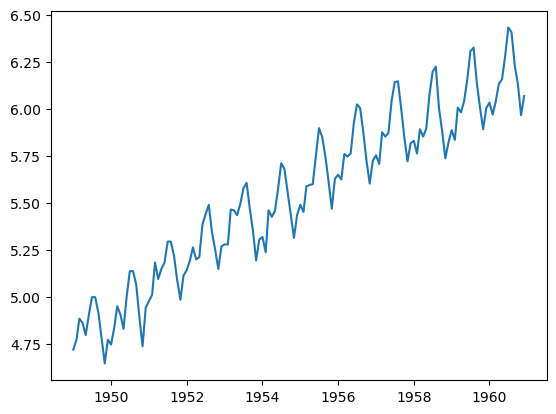

In [19]:
plt.plot(dfai_log)

In [20]:
dfai_log.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


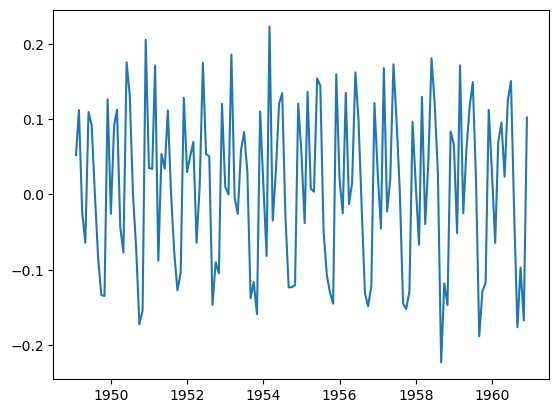

In [21]:
plt.plot(dfai_log.diff())

#after taking log (stabilize variance) and    - value of d is 1

- Auto corelation function ACF for `p` value
- Partial Auto corelation function PACF `q` value

In [59]:
#from statsmodels.graphics.isaplots import plot_acf,plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


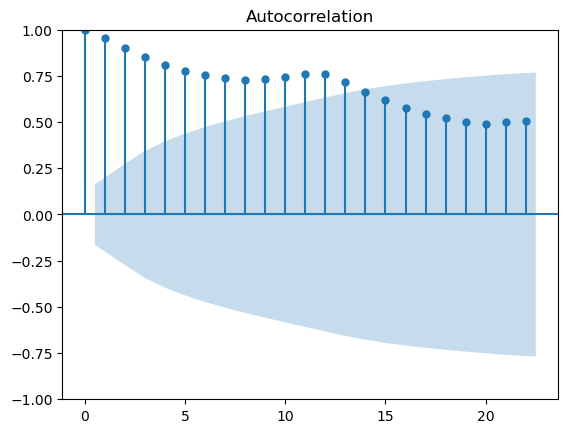

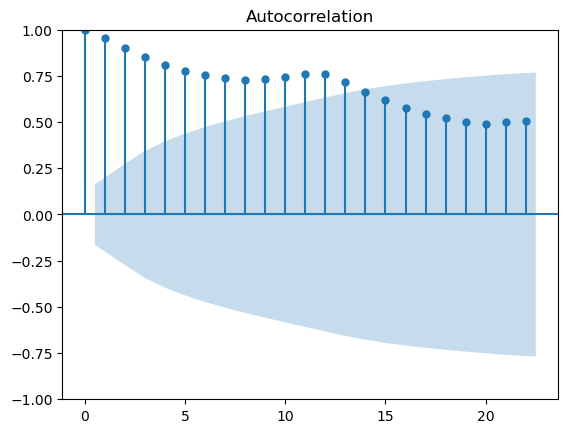

In [65]:
plot_acf(dfai_log)

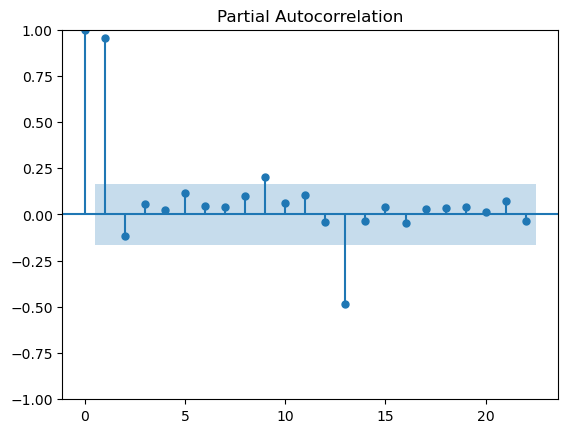

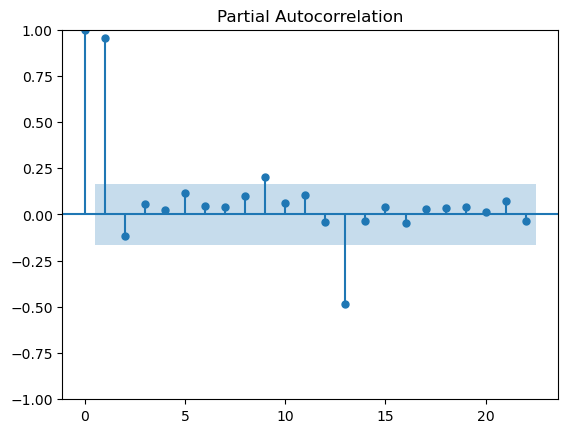

In [69]:
plot_pacf(dfai_log)

when acf declines slowly pacf declines rapidly called as AR process (mapped to p)

In [ ]:
pip install pmdarima

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [27]:
#Chech seasonality 

In [28]:
result = seasonal_decompose(dfai_log)

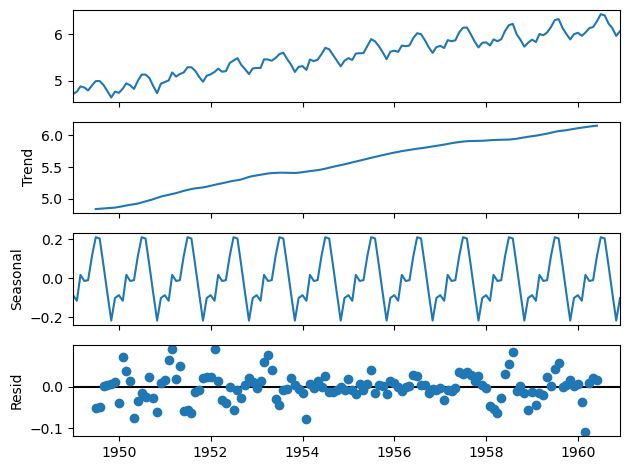

In [29]:
result.plot();#to get idea of data

- values increase or decrease with fixed time called seasonality

In [30]:
auto_arima(dfai_log,seasonal =True,m=12)  mis time period no of month

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [31]:
#whatever values will get from auto_Arima we will pass them in SARIMAX

In [32]:
model_sarima = SARIMAX(dfai_log,order=(2,0,0),seasonal_order = (0,1,1,12))

C:\Users\datascience\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\datascience\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
airpas_model = model_sarima.fit()

In [87]:
pred_values = airpas_model.predict(start=144,end = 155)

In [88]:
pred_values

1961-01-01    6.103840
1961-02-01    6.045890
1961-03-01    6.162775
1961-04-01    6.188957
1961-05-01    6.220978
1961-06-01    6.356003
1961-07-01    6.493253
1961-08-01    6.487675
1961-09-01    6.308305
1961-10-01    6.191378
1961-11-01    6.044703
1961-12-01    6.148074
Freq: MS, Name: predicted_mean, dtype: float64

In [38]:
pred_values1 = np.exp(pred_values)

In [39]:
pred_values1

1961-01-01    447.573250
1961-02-01    422.373664
1961-03-01    474.743676
1961-04-01    487.337767
1961-05-01    503.195312
1961-06-01    575.939632
1961-07-01    660.669179
1961-08-01    656.994187
1961-09-01    549.113433
1961-10-01    488.519062
1961-11-01    421.872365
1961-12-01    467.815338
Freq: MS, Name: predicted_mean, dtype: float64

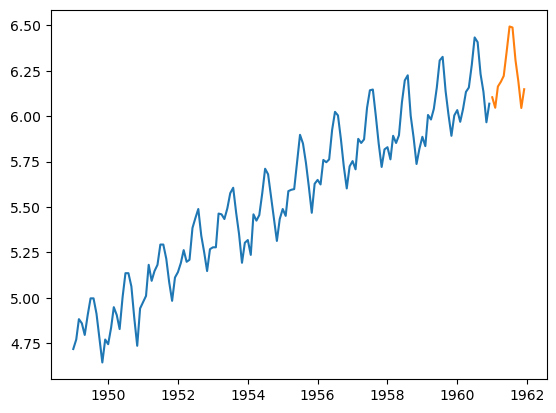

In [44]:
plt.plot(dfai_log)
plt.plot(pred_values) 

In [53]:
df = pd.DataFrame()
df["Predicted"] = pred_values1
date_for_pred = ['1961-01-01','1961-02-01','1961-03-01','1961-04-01','1961-05-01','1961-06-01','1961-07-01','1961-08-01','1961-09-01','1961-10-01','1961-11-01','1961-12-01']
df["Month"] = date_for_pred
df.Month = pd.to_datetime(df.Month,infer_datetime_format = True)
df = df.set_index("Month")

C:\Users\datascience\AppData\Local\Temp\ipykernel_8600\1302655921.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.Month = pd.to_datetime(df.Month,infer_datetime_format = True)


In [57]:
dfai

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [54]:
df`

,Predicted
Month,
1961-01-01,447.573250
1961-02-01,422.373664
1961-03-01,474.743676
1961-04-01,487.337767
1961-05-01,503.195312
1961-06-01,575.939632
1961-07-01,660.669179
1961-08-01,656.994187
1961-09-01,549.113433


<Axes: xlabel='Month'>

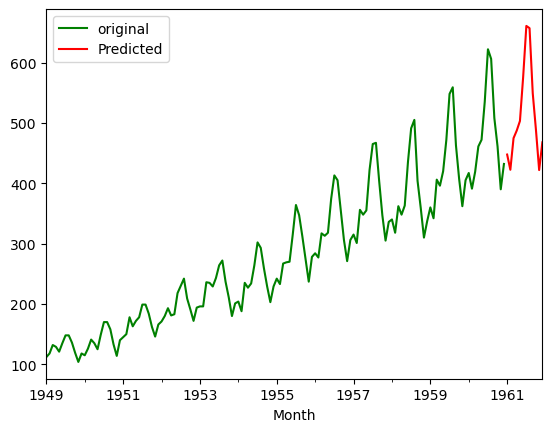

In [58]:
dfai["Passengers"].plot(legend = True,label = 'original',color ="green")
df["Predicted"].plot(legend= True,label = "Predicted",color="red")